### Based on https://github.com/HTuennermann/Vehicle-Detection-and-Tracking/

In [1]:
import glob 
import cv2
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
cars = glob.glob("./vehicles/*/*.png")
non_cars = glob.glob("./non-vehicles/*/*.png")

# Generate Y Vector
Y = np.concatenate([np.ones(len(cars)), np.zeros(len(non_cars))-1])

# Read X Vector
X = []
for name in cars:    
    X.append(skimage.io.imread(name))
for name in non_cars:    
    X.append(skimage.io.imread(name))
X = np.array(X)

print(X.shape)
print(Y.shape)


(17760, 64, 64, 3)
(17760,)


In [4]:
car_ski = skimage.io.imread(cars[0])
car_plt = plt.imread(cars[0])

# print(car_ski)
print(np.min(car_plt))
# X = X *255
# print(X[0])

0.0352941


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (15984, 64, 64, 3)
15984 train samples
1776 test samples


1.0


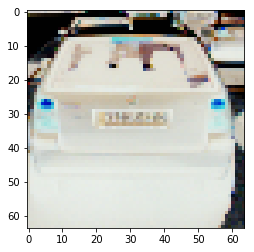

In [6]:
index = 3

plt.imshow(X_train[index])
print(Y_train[index])
# print(y_binary[index])

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


def get_conv(input_shape=(64,64,3), filename=None):
    model = Sequential()
    model.add(Lambda(lambda x: x/255 - 0.5,input_shape=input_shape))
    model.add(Convolution2D(10, (3, 3), activation='relu', name='conv1', padding="same"))
    model.add(Convolution2D(10, (3, 3), activation='relu', name='conv2', padding="same"))
    model.add(MaxPooling2D(pool_size=(8,8)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(128,(8,8),activation="relu",name="dense1")) # This was Dense(128)
    model.add(Dropout(0.5))
    model.add(Convolution2D(1,(1,1),name="dense2", activation="tanh")) # This was Dense(1)
#     model.add(Dense(1, activation='softmax'))
    if filename:
        model.load_weights(filename)        
    return model

model = get_conv()
model.add(Flatten())
model.compile(loss='mse',optimizer='adadelta',metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 10)        280       
_________________________________________________________________
conv2 (Conv2D)               (None, 64, 64, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 10)          0         
_________________________________________________________________
dense1 (Conv2D)              (None, 1, 1, 128)         82048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 128)         0         
__________

In [8]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
model.save_weights("localize.h5")

Train on 15984 samples, validate on 1776 samples
Epoch 1/20
5s - loss: 0.5403 - acc: 0.4567 - val_loss: 0.2438 - val_acc: 0.7596
Epoch 2/20
2s - loss: 0.2095 - acc: 0.8226 - val_loss: 0.1665 - val_acc: 0.8660
Epoch 3/20
2s - loss: 0.1340 - acc: 0.8925 - val_loss: 0.1042 - val_acc: 0.9274
Epoch 4/20
2s - loss: 0.1001 - acc: 0.9225 - val_loss: 0.0813 - val_acc: 0.9392
Epoch 5/20
2s - loss: 0.0834 - acc: 0.9367 - val_loss: 0.0742 - val_acc: 0.9454
Epoch 6/20
2s - loss: 0.0813 - acc: 0.9426 - val_loss: 0.0575 - val_acc: 0.9572
Epoch 7/20
2s - loss: 0.0676 - acc: 0.9502 - val_loss: 0.0519 - val_acc: 0.9600
Epoch 8/20
2s - loss: 0.0616 - acc: 0.9553 - val_loss: 0.0494 - val_acc: 0.9640
Epoch 9/20
2s - loss: 0.0561 - acc: 0.9590 - val_loss: 0.0515 - val_acc: 0.9668
Epoch 10/20
2s - loss: 0.0508 - acc: 0.9640 - val_loss: 0.0436 - val_acc: 0.9735
Epoch 11/20
2s - loss: 0.0503 - acc: 0.9637 - val_loss: 0.0420 - val_acc: 0.9724
Epoch 12/20
2s - loss: 0.0453 - acc: 0.9670 - val_loss: 0.0446 - val_

-1.0
prediction [[-0.99977309]]


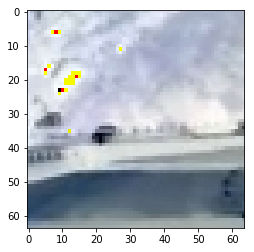

In [10]:
index = 1

plt.imshow(X_test[index])
print(Y_test[index])
prediction = model.predict(X_test[index][None, :, :, :])
print('prediction', prediction)

In [11]:
heatmodel = get_conv(input_shape=(None,None,3), filename="localize.h5")
# that is it!

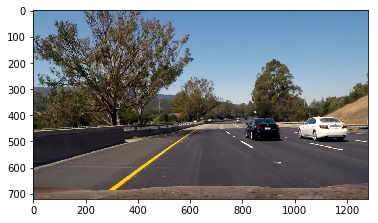

(1, 83, 153, 1)


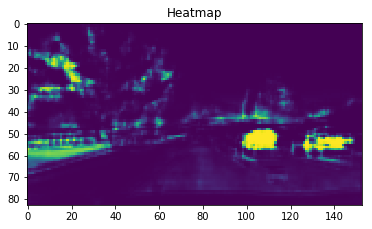

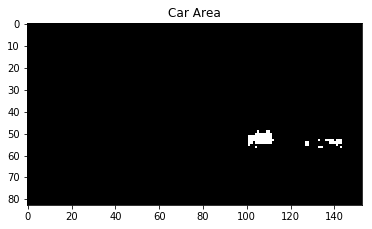

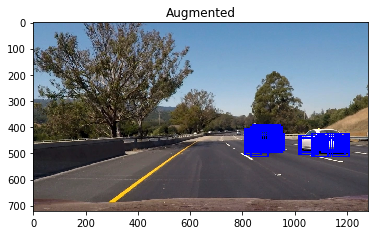

In [12]:

def locate():
    data = (skimage.io.imread("./test_images/test6.jpg"))
    
    heatmap = heatmodel.predict(data[None, :, :, :])
    plt.imshow(data)
    plt.show()
    print(heatmap.shape)
    
    plt.imshow(heatmap[0,:,:,0])
    plt.title("Heatmap")
    plt.show()
    plt.imshow(heatmap[0,:,:,0]>0.99, cmap="gray")
    plt.title("Car Area")
    plt.show()

    xx, yy = np.meshgrid(np.arange(heatmap.shape[2]),np.arange(heatmap.shape[1]))
    x = (xx[heatmap[0,:,:,0]>0.99])
    y = (yy[heatmap[0,:,:,0]>0.99])
    
    for i,j in zip(x,y):
        cv2.rectangle(data, (i*8,j*8), (i*8+64,j*8+64), (0,0,255), 5)
    return data

annotated = locate()

plt.title("Augmented")    
plt.imshow(annotated)
plt.show()